<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

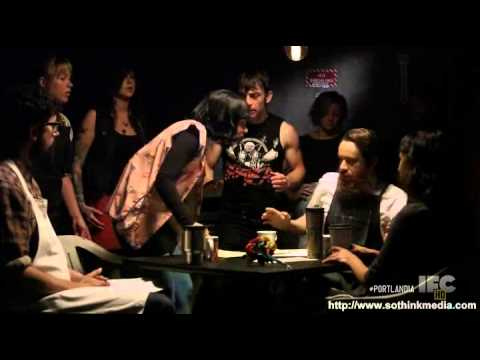

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
! pip install squarify

In [3]:
%pwd

'/content'

In [4]:
# import pandas library.
import pandas as pd

# set url for csv.
shops = pd.read_csv("https://raw.githubusercontent.com/CVanchieri/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv")
# show the shape of the data frame.
print(shops.shape)
# show the data fame with headers.
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# import re library.
import re

# clean the full_review_text column with lambda functions and regex.
#remove date.
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('\d+\/\d+\/\d+', '', x))
# remove check-in.
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('^.*?([A-Z])', '\\1', x))
# keep only letters and numbers.
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))
# convert  the text to lowercase.
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())

# convert star_rating to integer.
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x[1]))
# show the clean data frame with headers.
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,love love loved the atmosphere every corner of...,5
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4


In [8]:
# install 'en_core_web_lg'.
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
# import spacy and Tokenizer libraries.
import spacy
from spacy.tokenizer import Tokenizer

# set the nlp with .load on en_core_web_lg.
nlp = spacy.load("en_core_web_lg")
# set the tokenizer with .vocab.
tokenizer = Tokenizer(nlp.vocab)

# set the stop words.
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'im', 'ive', 'place', 'austin', 'come', 'definitely', 'order', 'spot', 'ordered'])

In [9]:
# tokenizer pipeline removing stop words, blank words and lemmatizing.
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)
    
# set the new tokens in the data frame.
shops['tokens'] = tokens
# show the data frame tokens.
shops['tokens'].head()

0    [love, love, love, atmosphere, corner, shop, s...
1    [list, date, night, ambiance, beautiful, love,...
2    [list, brunch, love, eclectic, homey, plush, d...
3    [cool, decor, good, drink, nice, seat, overpri...
4    [locate, northcross, mall, shop, center, face,...
Name: tokens, dtype: object

In [0]:
# import counter from collections library.
from collections import Counter

# create a count function.
def count(docs):
       
        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [11]:
# create a data frame for the words count.
wc = count(shops['tokens'])
# show the data frame with headers.
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
148,good,3438,5367,1.0,0.016460,0.016460,0.451418
99,great,2844,3930,2.0,0.012053,0.028512,0.373424
146,like,2266,3361,3.0,0.010308,0.038820,0.297532
459,time,1752,2379,4.0,0.007296,0.046116,0.230042
12,drink,1650,2374,5.0,0.007281,0.053396,0.216649


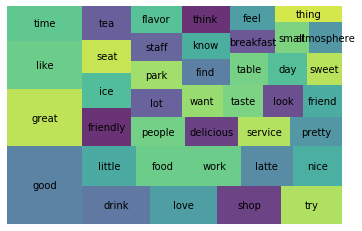

In [21]:
# import squarify and matplot.lib.pyplot libraries.
import squarify
import matplotlib.pyplot as plt

# set the top 20 with rank <=40.
wc_top20 = wc[wc['rank'] <= 40]
# plot with squarify.
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
# turn axis off.
plt.axis('off')
# show the plot.
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [6]:
# show the metrics for INT columns.
shops.describe()

,star_rating
count,7616.000000
mean,4.169118
std,1.065311
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [13]:
# show the value counts for star_rating column.
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [22]:
# check top words for the higher than a 4 rating.
shops_45 = shops[shops['star_rating'] >= 4]
# # set count on the data.
good_count = count(shops_45['tokens'])
# show the data frame with headers.
good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
180,good,2726,4230,1.0,0.016659,0.016659,0.443974
99,great,2496,3461,2.0,0.013630,0.030289,0.406515
176,like,1672,2420,3.0,0.009530,0.039819,0.272313
11,love,1604,2117,4.0,0.008337,0.048156,0.261238
33,shop,1349,1813,5.0,0.007140,0.055296,0.219707
367,time,1331,1766,6.0,0.006955,0.062251,0.216775
12,drink,1285,1761,7.0,0.006935,0.069186,0.209283
113,try,1327,1704,8.0,0.006711,0.075897,0.216124
184,little,1250,1554,9.0,0.006120,0.082017,0.203583
23,latte,1031,1538,10.0,0.006057,0.088074,0.167915


In [23]:
# check top words for the lower than3 ratings.
shops_13 = shops[shops['star_rating'] <= 3]
# # set count on the data.
bad_count = count(shops_13['tokens'])
# show the data frame with headers.
bad_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
24,good,712,1137,1.0,0.015759,0.015759,0.482385
21,like,594,941,2.0,0.013043,0.028802,0.402439
11,drink,365,613,3.0,0.008496,0.037298,0.247290
203,time,421,613,4.0,0.008496,0.045795,0.285230
48,food,316,494,5.0,0.006847,0.052642,0.214092
89,great,348,469,6.0,0.006501,0.059142,0.235772
18,service,346,447,7.0,0.006196,0.065338,0.234417
173,shop,315,433,8.0,0.006002,0.071339,0.213415
118,try,338,427,9.0,0.005918,0.077258,0.228997
139,little,312,408,10.0,0.005655,0.082913,0.211382


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [24]:
# bad_counter function.
def bad_counter(w):
    if w in bad_count['word'].values:
      bad_pct = bad_count.loc[bad_count['word'] == w, 'appears_in_pct'].item()
    else:
      bad_pct = 0
    
    return bad_pct
# add a new colomun with bad_counter data.
good_count['bad_appears_in_pct'] = good_count.apply(lambda x: bad_counter(x['word']), axis=1)
# show the dataframe with headers.
good_count.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: `item` has been deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct
180,good,2726,4230,1.0,0.016659,0.016659,0.443974,0.482385
99,great,2496,3461,2.0,0.013630,0.030289,0.406515,0.235772
176,like,1672,2420,3.0,0.009530,0.039819,0.272313,0.402439
11,love,1604,2117,4.0,0.008337,0.048156,0.261238,0.142954
33,shop,1349,1813,5.0,0.007140,0.055296,0.219707,0.213415
367,time,1331,1766,6.0,0.006955,0.062251,0.216775,0.285230
12,drink,1285,1761,7.0,0.006935,0.069186,0.209283,0.247290
113,try,1327,1704,8.0,0.006711,0.075897,0.216124,0.228997
184,little,1250,1554,9.0,0.006120,0.082017,0.203583,0.211382
23,latte,1031,1538,10.0,0.006057,0.088074,0.167915,0.155827


In [25]:
# create a new column by remove bad_appears_in_pct from appears_in_pct data.
good_count['appears_in_diff'] = good_count['appears_in_pct'] - good_count['bad_appears_in_pct']
# show the dataframe with headers.
good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
180,good,2726,4230,1.0,0.016659,0.016659,0.443974,0.482385,-0.038411
99,great,2496,3461,2.0,0.013630,0.030289,0.406515,0.235772,0.170742
176,like,1672,2420,3.0,0.009530,0.039819,0.272313,0.402439,-0.130126
11,love,1604,2117,4.0,0.008337,0.048156,0.261238,0.142954,0.118284
33,shop,1349,1813,5.0,0.007140,0.055296,0.219707,0.213415,0.006292
367,time,1331,1766,6.0,0.006955,0.062251,0.216775,0.285230,-0.068455
12,drink,1285,1761,7.0,0.006935,0.069186,0.209283,0.247290,-0.038007
113,try,1327,1704,8.0,0.006711,0.075897,0.216124,0.228997,-0.012874
184,little,1250,1554,9.0,0.006120,0.082017,0.203583,0.211382,-0.007799
23,latte,1031,1538,10.0,0.006057,0.088074,0.167915,0.155827,0.012089


In [26]:
# top 10 words for good shops.
good_count.sort_values(by=['appears_in_diff'], ascending=False)[:10]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
99,great,2496,3461,2.0,0.013630,0.030289,0.406515,0.235772,0.170742
560,delicious,1178,1314,15.0,0.005175,0.116142,0.191857,0.056233,0.135624
11,love,1604,2117,4.0,0.008337,0.048156,0.261238,0.142954,0.118284
129,friendly,1420,1487,12.0,0.005856,0.099790,0.231270,0.122629,0.108642
566,amaze,695,798,38.0,0.003143,0.203719,0.113192,0.031165,0.082027
167,perfect,623,699,47.0,0.002753,0.229865,0.101466,0.026423,0.075043
332,favorite,660,775,39.0,0.003052,0.206771,0.107492,0.034553,0.072939
490,awesome,556,619,61.0,0.002438,0.266116,0.090554,0.029133,0.061421
170,super,674,773,40.0,0.003044,0.209816,0.109772,0.066396,0.043376
415,recommend,598,630,59.0,0.002481,0.261241,0.097394,0.054878,0.042516


In [27]:
# top 10 words for bad shops.
good_count.sort_values(by=['appears_in_diff'])[:10]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
176,like,1672,2420,3.0,0.009530,0.039819,0.272313,0.402439,-0.130126
515,okay,202,214,250.0,0.000843,0.524954,0.032899,0.144986,-0.112087
862,ask,310,345,135.0,0.001359,0.404371,0.050489,0.149051,-0.098563
287,service,861,933,26.0,0.003674,0.163384,0.140228,0.234417,-0.094189
395,taste,678,814,36.0,0.003206,0.197398,0.110423,0.192412,-0.081988
164,didnt,435,496,95.0,0.001953,0.339997,0.070847,0.151762,-0.080915
876,customer,273,307,160.0,0.001209,0.436459,0.044463,0.125339,-0.080876
54,wasnt,261,301,162.0,0.001185,0.438834,0.042508,0.116531,-0.074023
491,review,477,531,82.0,0.002091,0.313851,0.077687,0.151084,-0.073397
112,maybe,186,207,257.0,0.000815,0.530708,0.030293,0.103659,-0.073365


It is clear from the data that shops with ratings of 4 and 5 have reviews that mention the following words more often than shops with rating of 1, 2 and 3:

great, delicious, love, friendly, amaze, perfect, favorite, awesome, super and recommend.

For shops with ratings of 1, 2 and 3 the following words dominated:

like, okay, ask, service, taste, didnt, customer, wasnt, review and maybe

The charts above show that these 10 words have the greatest relative difference (appears_in_diff) between the good and the bad shops. The result is calculated by counting the reviews in which the word appears in (appears_in) for good and bad shops, calculating the percent of the total reviews (appears_in_pct) for good shops, calculating the percent of total reviews in bad shops (bad_appears_in_pct), calculating the difference between the good and the bad shops (appears_in_diff). Sorting (appears_in_diff) in ascending order provides the biggest difference between good and bad shops and sorting in descending order provides the biggest difference between bad and good shops.

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

